In [0]:
#@title aria2c is a cli tool for multiple connection downloading
# !apt-get install aria2

### Download Dataset

In [0]:
# !aria2c -x 16 -s 16 https://huew.blob.core.windows.net/assignments/small-2oq-c1r.tar.gz

### Unzip using tar command and delete the tar.gz file 

In [7]:
#@title unzip and delete the zip file

!tar xvzf small-2oq-c1r.tar.gz

!rm -f small-2oq-c1r.tar.gz

small-2oq-c1r.csv


In [8]:
#@title file Size is around 1.3 gb
ls -sh

total 1.3G
4.0K datalab/  1.3G small-2oq-c1r.csv


In [0]:
import pandas

### Data Set actually has some misformed  lines so .
### I choose to not to load them into dataframe

In [0]:
df=pandas.read_csv("small-2oq-c1r.csv",error_bad_lines=False,warn_bad_lines=False,low_memory=False)

### Show Percentage of null values in Each Column

In [0]:
def null_values_column(dataframe):
  
  columns=dataframe.columns.tolist()
  
  percentages = []
  total_nulls = []
  
  lr = dataframe.shape[0]
  
  for name in columns:
    null_no = dataframe[name].isna().sum()
    total_nulls.append(null_no)
    percentages.append((null_no+0.0)/lr*100)
    
  
  
  temp=pandas.DataFrame({'columns':columns,'number_of_nulls':total_nulls,'total_rows':[lr]*len(columns),'percentage_null':percentages})
  
  return temp
    
    

stats = null_values_column(df)

In [12]:
stats

,columns,number_of_nulls,percentage_null,total_rows
0,productId,0,0.000000,1063787
1,title,15,0.001410,1063787
2,description,353048,33.187847,1063787
3,imageUrlStr,1263,0.118727,1063787
4,mrp,4,0.000376,1063787
5,sellingPrice,4396,0.413241,1063787
6,specialPrice,4396,0.413241,1063787
7,productUrl,4,0.000376,1063787
8,categories,6,0.000564,1063787
9,productBrand,8,0.000752,1063787


###  There are some rows with 100 percent null vlaues so i am gonna drop them 

In [0]:
df=df.dropna(1,how='all')

In [141]:
df.shape

(1063781, 27)

### Number of null values in categories column is low --> we would delete these 6 rows 

In [142]:
print("number of null values per column {ref}".format(ref=df.categories.isna().sum()))

number of null values per column 0


In [0]:
#@title There are only 6 null values in a million. So i choose to drop them them

df=df.dropna(subset=['categories'])

In [0]:
from collections import Counter

apparel_types=Counter(df.categories)

In [16]:
print("total different apparal labels : {ff}".format(ff=len(apparel_types.keys())))

total different apparal labels : 114


### Collect all types of tops or tunics 

In [0]:
apparal_labels=apparel_types.keys()

apparal_tops = []
apparal_tunics = []

for labal in apparal_labels:
  # CHeck whether 'top' is in tail part of label or not 
  last_label=labal.split(">")[-1]
  if 'Tops'.lower() in last_label.lower():
    apparal_tops.append(labal)
  if 'Tunics'.lower() in last_label.lower():
    apparal_tunics.append(labal)
    

In [17]:
apparal_tops

['Apparels>Women>Winter & Seasonal Wear>Thermals>Thermal Tops',
 'Apparels>Men>Winterwear & Seasonalwear>Thermal Tops',
 'Apparels>Women>Maternity Wear>Shirts, Tops & Tunics>Tops',
 'Apparels>Men>Sportswear>Track Tops',
 'Apparels>Women>Fusion Wear>Shirts, Tops & Tunics>Tops',
 'Apparels>Women>Sports & Gym Wear>Track Tops',
 'Apparels>Kids>Girls>T-Shirts & Tops>Tops',
 'Apparels>Kids>Infants>Baby Girls>T-Shirts & Tops>Tops',
 'Apparels>Women>Western Wear>Shirts, Tops & Tunics>Tops']

>>>>>## Seperate DataFrames for Tops and Tunics 
## From now on we work on tops_dataframe

In [0]:

df_tops = df[df['categories'].isin(apparal_tops)]

df_tunics = df[df['categories'].isin(apparal_tunics)]

In [104]:
df_tunics.imageUrlStr.tolist()[0].split(";")

['http://img.fkcdn.com/image/tunic/b/f/y/1-1-3422-vea-kupia-s-original-imae7sr4t7unbrwz.jpeg',
 'http://img.fkcdn.com/image/tunic/b/f/y/1-1-3422-vea-kupia-s-200x200-imae7sr4t7unbrwz.jpeg',
 'http://img.fkcdn.com/image/tunic/b/f/y/1-1-3422-vea-kupia-s-400x400-imae7sr4t7unbrwz.jpeg',
 'http://img.fkcdn.com/image/tunic/b/f/y/1-1-3422-vea-kupia-s-800x800-imae7sr4t7unbrwz.jpeg']

In [0]:
def base_url(urli):
  
  return urli.split("://")[1].split("/")[0]
  


>>>> ### Find number of websites in the data dump



In [45]:
#@title only unique base url that found was flipkart
df_tunics['productUrl'].apply(base_url).nunique()

1

### I would like to remove duplicate ProductId's


In [68]:
null_values_column(df_tunics)

,columns,number_of_nulls,percentage_null,total_rows
0,productId,0,0.000000,44001
1,title,0,0.000000,44001
2,description,20920,47.544374,44001
3,imageUrlStr,0,0.000000,44001
4,mrp,0,0.000000,44001
5,sellingPrice,0,0.000000,44001
6,specialPrice,0,0.000000,44001
7,productUrl,0,0.000000,44001
8,categories,0,0.000000,44001
9,productBrand,0,0.000000,44001


### Drop columns DeliveryTime ,sizeUnit
>### ->I think DropTime cannot be good differentiator for duplicates and sizeUnit column is almost null

In [0]:
df_tops = df_tops.drop(columns=['deliveryTime','sizeUnit'])
df_tunics = df_tunics.drop(columns=['deliveryTime','sizeUnit'])

#### Since Most of columns have null percentage in range of 0.01 


In [0]:
## Select every column except 'description'
remove_col_tops=[nam for nam in df_tops.columns.tolist() if nam!='description']
remove_col_tunics = [t for t in df_tunics.columns.tolist() if t!='description' and t!='neck' ]

In [0]:
df_tops=df_tops.dropna(subset=remove_col_tops)
df_tunics = df_tunics.dropna(subset=remove_col_tunics)

In [0]:
df_tops_=df_tops.drop_duplicates(subset=['productId'])
df_tunics = df_tunics.drop_duplicates(subset=['productId'])

In [0]:
def img_urls_bysizes(url):
  
  return url.split(";")[0]
  

#### Fix ProductBrand and ProductSeller Names

In [0]:
df_tops['original_imgsizes']=df_tops['imageUrlStr'].apply(img_urls_bysizes)

df_tunics['original_imgsizes']=df_tunics['imageUrlStr'].apply(img_urls_bysizes)

In [0]:
def get_original_names(name):
  l = len(name)
  
  for gap in range(1,l):
    for index in range(0,l,gap):
      pass

In [0]:
get_original_names("malinimalini")

### Extract Neck and sleeve features from keySpecsStr column

### do data cleaning for description and seller name columns

In [0]:
special_characters = "[!@#$%^&*()[]{};:,./<>?\|`~-=_+]"

In [0]:
def replace_(stri,org):
  try:
    ass = stri[0]
  except IndexError:
    return org
  
  return replace_(stri[1:],org.replace(ass,""))

In [0]:
df_tops['description']=df_tops['description'].fillna("")
df_tunics['description']=df_tunics['description'].fillna("")

In [0]:
clean_data=lambda des : replace_(special_characters,des).replace("'","").lower().lstrip()

In [0]:
df_tops['description']=df_tops['description'].apply(clean_data)
df_tunics['description']=df_tunics['description'].apply(clean_data)

In [0]:
df_tops['sellerName']=df_tops['sellerName'].apply(lambda nam : nam.replace(" ","_").lower().strip())
df_tunics['sellerName']=df_tunics['sellerName'].apply(lambda nam : nam.replace(" ","_").lower().strip())

In [0]:
df_tops['title']=df_tops['title'].apply(clean_data)
df_tunics['title']=df_tunics['title'].apply(clean_data)

In [0]:
df_tops['productBrand']=df_tops['productBrand'].apply(clean_data).apply(lambda e : e.replace(" ","_"))
df_tunics['productBrand']=df_tunics['productBrand'].apply(clean_data).apply(lambda e : e.replace(" ","_"))

### There are multiple cases of duplicates
>#### Case 1: Same Pattern different Colours
>>#### Seller Creates seperate pages for same tops with same design patterns  but with different colours  on different urls

>#### Case 2: Different Sizes

>>#### Seller create similar  webpages with different urls using same  images  for  different sizes .


### Here we investigate first case
> #### KeySpecsStr is best feature so far i came to identify duplicate products of type 1.

>### we groupby sellername,productbrand,keySPecsStr
>### 'KeySpecsStr' is key differentiator for detecting the same pattern dresses And it is stronger feature than description 
>### because some sellers used same description for different products and different description for same images 

>### I observed that if we groupby description different products ended up in same index level or by bucket

### we take non numerical columns just for demo 

In [0]:
de_tops=df_tops[['sellerName','productBrand','keySpecsStr','color','original_imgsizes','productUrl']]
de_tunics=df_tunics[['sellerName','productBrand','keySpecsStr','color','original_imgsizes','productUrl']]

In [207]:
# de_tops.shape

(341712, 6)

In [0]:
# de_tunics

In [0]:
# df_tops.columns.tolist()

In [0]:
demo_tops=de_tops.groupby(by=['sellerName','productBrand','keySpecsStr','color'])
demo_tunics=de_tunics.groupby(by=['sellerName','productBrand','keySpecsStr','color'])

In [0]:
temp_tops=demo_tops.sum()

### Takes some time to groupby

In [193]:
temp_tops.head()

original_imgsizes  \
sellerName        productBrand keySpecsStr                                        color                                                           
2day_fashion_     tooba        Round Neck, Sleeveless;Fabric: Cotton;Pattern: ... Multicolor  http://img.fkcdn.com/image/top/g/3/g/strp-top-...   
                               Round Neck, Sleeveless;Fabric: Georgette;Patter... Multicolor  http://img.fkcdn.com/image/top/g/x/t/top-pck-2...   
99yrs_network_llp aqva         Round Neck, 3/4th Sleeve;Fabric: Cotton;Pattern... Red         http://img.fkcdn.com/image/top/y/s/k/aq76260-b...   
                               U Neck, 3/4th Sleeve;Fabric: Cotton;Pattern: Pr... Black       http://img.fkcdn.com/image/top/j/g/v/aq76260-b...   
                                                                                  Blue        http://img.fkcdn.com/image/top/m/h/3/aq76260-b...   

                                                                                                                                     productUrl  
sellerName        productBrand keySpecsStr                                        color                                                          
2day_fashion_     tooba        Round Neck, Sleeveless;Fabric: Cotton;Pattern: ... Multicolor  http://dl.flipkart.com/dl/tooba-casual-sleevel...  
                               Round Neck, Sleeveless;Fabric: Georgette;Patter... Multicolor  http://dl.flipkart.com/dl/tooba-casual-sleevel...  
99yrs_network_llp aqva         Round Neck, 3/4th Sleeve;Fabric: Cotton;Pattern... Red         http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                               U Neck, 3/4th Sleeve;Fabric: Cotton;Pattern: Pr... Black       http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                                                                                  Blue        http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...

In [0]:
third_level_1="Occasion: Casual;Fabric: Rayon;Hemline: U-shape;Sleeve: 3/4th Sleeve;Pattern: Printed"

In [0]:
third_level = "U Neck, 3/4th Sleeve;Fabric: Cotton;Pattern: Printed;Type: Top;Pack of 1"

In [0]:
some_sort_0=temp_tops.loc['99yrs_network_llp','aqva',third_level,:]

In [200]:
some_sort_0.head()

original_imgsizes  \
sellerName        productBrand keySpecsStr                                        color                                                             
99yrs_network_llp aqva         U Neck, 3/4th Sleeve;Fabric: Cotton;Pattern: Pr... Black         http://img.fkcdn.com/image/top/j/g/v/aq76260-b...   
                                                                                  Blue          http://img.fkcdn.com/image/top/m/h/3/aq76260-b...   
                                                                                  Crimson       http://img.fkcdn.com/image/top/v/b/z/aq64160b-...   
                                                                                  Crimson Sand  http://img.fkcdn.com/image/top/z/f/w/aq76275-b...   
                                                                                  Lime          http://img.fkcdn.com/image/top/a/y/c/aq76260-b...   

                                                                                                                                       productUrl  
sellerName        productBrand keySpecsStr                                        color                                                            
99yrs_network_llp aqva         U Neck, 3/4th Sleeve;Fabric: Cotton;Pattern: Pr... Black         http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                                                                                  Blue          http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                                                                                  Crimson       http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                                                                                  Crimson Sand  http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...  
                                                                                  Lime          http://dl.flipkart.com/dl/aqva-casual-3-4th-sl...

In [0]:
imgs_to_download=some_sort_0.original_imgsizes.tolist()

In [0]:
imgs_to_download = ["http"+image_url.split("http")[1] for image_url in imgs_to_download]

#### Download the images for manual observation

In [0]:
import requests

for index_,img_url in enumerate(imgs_to_download):
  res=requests.get(img_url)
  with open("img_"+str(index_)+".jpeg","wb") as e:
    e.write(res._content)
    e.close()

In [204]:
ls -sh

total 1.3G
4.0K datalab/     296K img_12.jpeg  220K img_4.jpeg  240K img_8.jpeg
308K img_0.jpeg   292K img_1.jpeg   312K img_5.jpeg  236K img_9.jpeg
356K img_10.jpeg  296K img_2.jpeg   308K img_6.jpeg  1.3G small-2oq-c1r.csv
308K img_11.jpeg  312K img_3.jpeg   356K img_7.jpeg


### Both below  images have same pattern but they are found in the different webpage urls


#### Solely using keySpecsStr may not be isolate tops with same pattern together

### U will also find that descriptions from productUrl pages are different for same pattern shirts
### I think that description is not good feature for duplicate detection

### From here we would like to extract features from images

In [370]:
#@title right most three images have same pattern and we  would usually see all three images shown as a same product in the aweb page but not in this dataset they have different urls

%%HTML
<div class="row">
  <div class="column">
    <img src="http://img.fkcdn.com/image/top/j/g/v/aq76260-b-rcrbl-aqva-xl-original-imaepz7rjma6mzsf.jpeg" alt="Snow" style="width:13%">  
    <img src="http://img.fkcdn.com/image/top/m/h/3/aq76260-b-rcrb-aqva-s-original-imaepz7rbzck72nz.jpeg" alt="Forest" style="width:13%">
    <img src="http://img.fkcdn.com/image/top/a/y/c/aq76260-b-rcrli-aqva-l-original-imaepz7rrawjwag2.jpeg" alt="Mountains" style="width:15%">
    
    <img src="http://img.fkcdn.com/image/top/d/t/u/aq64160b-a-abtnv-aqva-s-original-imaepz7rzfchvzwx.jpeg" alt="Mountains" style="width:17%">
    <img src ="http://img.fkcdn.com/image/top/4/v/x/aq64160b-a-abtor-aqva-l-original-imaepz7rhdgg7yhd.jpeg" alt ="flask" style = "width:15%">
    <img src="http://img.fkcdn.com/image/top/v/a/f/aq64160b-a-abtp-aqva-l-original-imaepz7rkhbhz7rk.jpeg" alt = "somthing" style ="width:13%">
  </div>
</div>

In [371]:
#@title first three had exact patterns but different colurs so were last two
%%HTML
<div class="row">
  <div class="column">
    
    <img src ="http://img.fkcdn.com/image/top/v/g/q/aq76275-btnvsk-aqva-xl-original-imaepz7rqgzbzupe.jpeg" alt ="something4" style="width:15%">
     <img src ="http://img.fkcdn.com/image/top/2/4/g/aq76275-btsf-aqva-xl-original-imaepz7raetxrchh.jpeg" alt="something5" style="width:15%">
    <img src="http://img.fkcdn.com/image/top/z/f/w/aq76275-btcs-aqva-m-original-imaepz7rgwrzbafz.jpeg" alt="something4" style="width:15%">
    
    <img src="http://img.fkcdn.com/image/top/3/y/s/aq76275-a-hflr-aqva-l-original-imaepz7rzrk2zjc8.jpeg" alt ="somthing3" style="width:18%">
    <img src ="http://img.fkcdn.com/image/top/d/n/z/aq76275-a-hflsk-aqva-l-original-imaepz7rzfhgdpqq.jpeg" alt="somthnig2" style  ="width:20%">

</div>
</div>

### I beleive that combining the image fearures with text give us best chance

In [0]:
fourth=[12,10] ### hexagonal pattern / above to the last right 

In [0]:
third=[7,11,3] ### square pattern tops /above first three 

In [0]:
first=[0,1,4] ### Leaf pattern tops / first three
second=[6,8,9] ### 

In [0]:
from skimage.feature import local_binary_pattern
import cv2
from scipy.stats import itemfreq

In [397]:
ls -sh

total 1.3G
4.0K datalab/     296K img_12.jpeg  220K img_4.jpeg  240K img_8.jpeg
308K img_0.jpeg   292K img_1.jpeg   312K img_5.jpeg  236K img_9.jpeg
356K img_10.jpeg  296K img_2.jpeg   308K img_6.jpeg  1.3G small-2oq-c1r.csv
308K img_11.jpeg  312K img_3.jpeg   356K img_7.jpeg


In [0]:
histograms=[]
from PIL import Image
for img_num in range(0,13):
    # Read the image
    im = cv2.imread("img_"+str(img_num)+".jpeg")
    small = cv2.resize(im, (800, 500)) 
    # Convert to grayscale as LBP works on grayscale image
    im_gray = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)
    im_g = Image.fromarray(im_gray)
    im_g.save("gray_"+str(img_num)+".jpeg")
#     print(type(im_gray))
    radius = 12
    # Number of points to be considered as neighbourers 
    no_points = 8 * 3
    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
    # Calculate the histogram
    x = itemfreq(lbp.ravel())
    hist = x[:, 1]/sum(x[:, 1])
    histograms.append(hist)

In [556]:
[len(ee) for ee in histograms]

[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]

In [0]:
import numpy
comp_hist={numerical:[] for numerical in range(13)}
for img_f_0 in range(0,13):
  for img_f_1 in range(0,13):
    histograms[img_f_0] = numpy.float32(histograms[img_f_0])
    histograms[img_f_1] = numpy.float32(histograms[img_f_1])
    score=cv2.compareHist(histograms[img_f_0], histograms[img_f_1],cv2.HISTCMP_CHISQR)
    comp_hist[img_f_0].append((score,"img_"+str(img_f_1)))

In [0]:
from operator import itemgetter

### scores values are sorted for each key based on chisqure score 

In [0]:
for key_score in comp_hist:
  lists = comp_hist[key_score]
  comp_hist[key_score]= sorted(lists,key=itemgetter(0))

### Only image_names are taken from internal lists and formed as dataframe for us to view

In [0]:
#@title Remarks  7,3,11 were perfectly identified as they are ranked for 6,8,9 pair 
comparision_matrix=pandas.DataFrame([[score_[1] for score_ in scores_] for scores_ in comp_hist.values()])

In [0]:
comparision_matrix=comparision_matrix.set_index([["img_"+str(numer) for numer in range(0,13)]])

In [591]:
#@title For most of pairs best matches appeared in top 4 scores 
comparision_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
img_0,img_0,img_1,img_9,img_3,img_11,img_7,img_4,img_10,img_2,img_8,img_5,img_6,img_12
img_1,img_1,img_0,img_9,img_4,img_11,img_3,img_10,img_2,img_7,img_8,img_5,img_6,img_12
img_2,img_2,img_6,img_10,img_5,img_11,img_4,img_8,img_1,img_3,img_9,img_0,img_12,img_7
img_3,img_3,img_11,img_7,img_10,img_0,img_1,img_2,img_5,img_4,img_9,img_12,img_6,img_8
img_4,img_4,img_2,img_1,img_5,img_10,img_11,img_9,img_6,img_0,img_12,img_8,img_3,img_7
img_5,img_5,img_12,img_10,img_4,img_2,img_11,img_6,img_3,img_1,img_0,img_9,img_7,img_8
img_6,img_6,img_2,img_5,img_12,img_10,img_4,img_8,img_11,img_9,img_1,img_0,img_3,img_7
img_7,img_7,img_3,img_11,img_0,img_10,img_1,img_9,img_2,img_4,img_5,img_6,img_8,img_12
img_8,img_8,img_9,img_2,img_4,img_1,img_0,img_6,img_11,img_10,img_3,img_5,img_12,img_7
img_9,img_9,img_1,img_0,img_8,img_4,img_11,img_3,img_2,img_10,img_7,img_6,img_5,img_12


### Observations:
>### From above table 7,11,3 pair  worked because when converted to grey they look very familiar or similar 
>### Local Bianry Patterns may not be the best algorithm for duplicate segmentation when colours are so contrast
>### KeySepcsStr can be used as priliminary filter 

In [0]:
import IPython

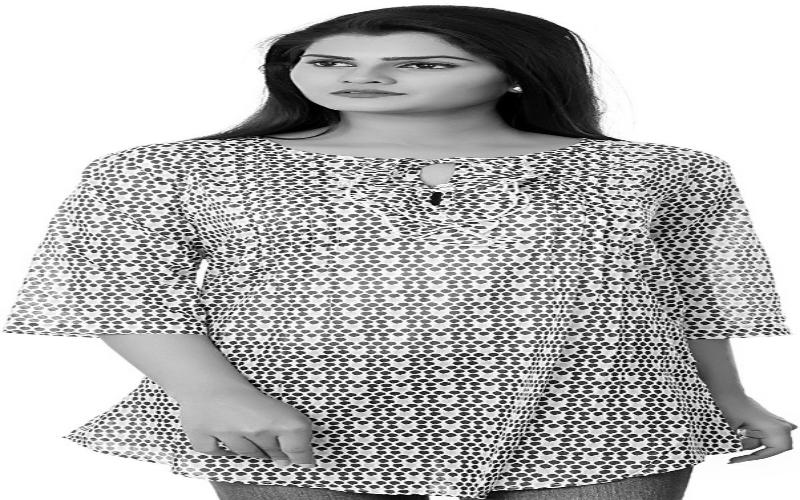

In [571]:
IPython.display.Image("gray_7.jpeg")

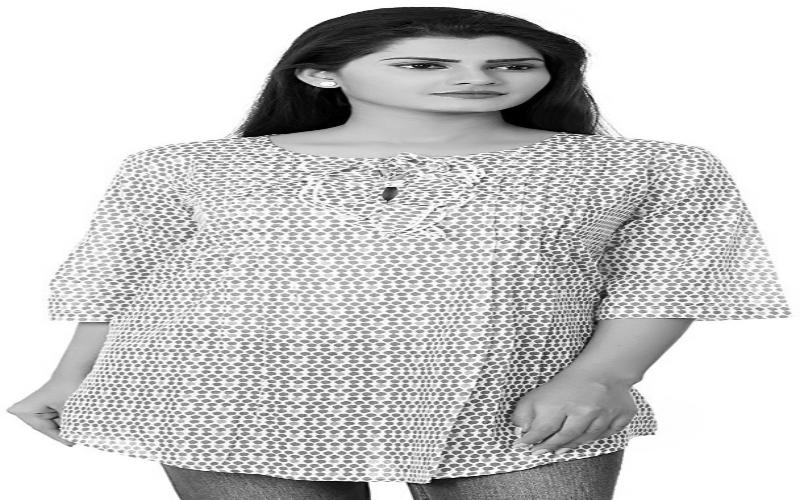

In [573]:
IPython.display.Image("gray_3.jpeg")

In [597]:
len(temp_tops.original_imgsizes.tolist())

104756